In [1]:
import pandas as pd
import numpy as np
import re as re
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
laptop = pd.read_csv("Raw.csv", sep=';')
laptop.head(5)

,web-scraper-order,web-scraper-start-url,Name,Name-href,CPU,GPU,Display,Storage,RAM,Weight,Price
0,1641795829-197,https://laptopmedia.com/specs/?q=&hPP=20&idx=l...,Acer Aspire 1,https://laptopmedia.com/laptop-specs/acer-aspi...,CPU: Intel Celeron N4500,GPU: Intel UHD Graphics (Jasper Lake 16 EU),"Display: 15.6, Full HD (1920 x 1080), TN",Storage: 1000GB SSD,RAM: 16GB DDR4,Weight: 1.65 kg (3.6 lbs),$639.00 #CommissionsEarned
1,1641795161-148,https://laptopmedia.com/specs/?q=&hPP=20&idx=l...,Acer Aspire 1,https://laptopmedia.com/laptop-specs/acer-aspi...,CPU: Intel Celeron N4500,GPU: Intel UHD Graphics (Jasper Lake 16 EU),"Display: 15.6, Full HD (1920 x 1080), TN",Storage: 1000GB SSD,RAM: 16GB DDR4,Weight: 1.65 kg (3.6 lbs),$639.00 #CommissionsEarned
2,1641795175-149,https://laptopmedia.com/specs/?q=&hPP=20&idx=l...,Acer Aspire 1,https://laptopmedia.com/laptop-specs/acer-aspi...,CPU: Intel Celeron N4500,GPU: Intel UHD Graphics (Jasper Lake 16 EU),"Display: 15.6, Full HD (1920 x 1080), TN",Storage: 1000GB SSD,RAM: 32GB DDR4,Weight: 1.65 kg (3.6 lbs),$749.00 #CommissionsEarned
3,1641795816-196,https://laptopmedia.com/specs/?q=&hPP=20&idx=l...,Acer Aspire 1,https://laptopmedia.com/laptop-specs/acer-aspi...,CPU: Intel Celeron N4500,GPU: Intel UHD Graphics (Jasper Lake 16 EU),"Display: 15.6, Full HD (1920 x 1080), TN",Storage: 1000GB SSD,RAM: 32GB DDR4,Weight: 1.65 kg (3.6 lbs),$749.00 #CommissionsEarned
4,1641795842-198,https://laptopmedia.com/specs/?q=&hPP=20&idx=l...,Acer Aspire 1,https://laptopmedia.com/laptop-specs/acer-aspi...,CPU: Intel Celeron N4500,GPU: Intel UHD Graphics (Jasper Lake 16 EU),"Display: 15.6, Full HD (1920 x 1080), TN",Storage: 2000GB SSD,RAM: 32GB DDR4,Weight: 1.65 kg (3.6 lbs),$919.00 #CommissionsEarned


### ------   
As we can see, the data is quite messy. 

We can separate the info from the existing column.

But first, lets drop the first, second and fourth column we dont really need it.

In [3]:
laptop.drop(['web-scraper-order','web-scraper-start-url','Name-href'], axis=1, inplace=True)
laptop.sample(7)

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price
3668,Dell Latitude 5510,CPU: Intel Core i5-10210U,GPU: Intel UHD Graphics,"Display: 15.6, Full HD (1920 x 1080), IPS",Storage: 256GB SSD,RAM: 8GB DDR4,Weight: 1.82 kg (4 lbs),$917.58 #CommissionsEarned
4607,Lenovo IdeaPad 3i 15,CPU: Intel Core i5-1135G7,GPU: Intel Iris Xe Graphics G7 (80EU),"Display: 15.6, Full HD (1920 x 1080), IPS",Storage: 256GB SSD,RAM: 12GB,Weight: 1.65 kg (3.6 lbs),$759.00 #CommissionsEarned
2455,ASUS VivoBook 17,CPU: Intel Core i7-1065G7,GPU: Intel Iris Plus Graphics G7,"Display: 17.3, HD+ (1600 x 900), TN",Storage: 1000GB SSD,RAM: 24GB DDR4,Weight: 2.30 kg (5.1 lbs),$989.00 #CommissionsEarned
1129,Acer Swift 3,CPU: Intel Core i7-11370H,GPU: Intel Iris Xe Graphics G7 (96EU),"Display: 16.1, Full HD (1920 x 1080), IPS",Storage: 512GB SSD,RAM: 16GB LPDDR4x,Weight: 1.70 kg (3.7 lbs),$1302.68 #CommissionsEarned
2523,ASUS Vivobook 17 F712,CPU: Intel Core i7-1065G7,GPU: Intel Iris Plus Graphics G7,"Display: 17.3, HD+ (1600 x 900), TN",Storage: 512GB SSD + 1000GB HDD,RAM: 24GB DDR4,Weight: 2.30 kg (5.1 lbs),$1099.00 #CommissionsEarned
2348,ASUS Vivobook 17,CPU: Intel Core i7-1065G7,GPU: Intel Iris Plus Graphics G7,"Display: 17.3, HD+ (1600 x 900), TN",Storage: 2000GB SSD,RAM: 24GB,Weight: 2.30 kg (5.1 lbs),$1829.00 #CommissionsEarned
3419,Dell Latitude 3510,CPU: Intel Core i5-10210U,GPU: Intel UHD Graphics,"Display: 15.6, Full HD (1920 x 1080), IPS",Storage: 1000GB SSD,RAM: 16GB DDR4,Weight: 1.79 kg (3.9 lbs),$1049.99 #CommissionsEarned


### ------   
In each column, there are some repeated text, like "CPU:" in CPU column, "GPU:" in GPU column. 

We need to delete it and also we need to delete "#CommissionsEarned" and "$" in Price column

In [4]:
laptop['CPU'] = laptop['CPU'].str.replace('CPU:','')
laptop['GPU'] = laptop['GPU'].str.replace('GPU:','')
laptop['Display'] = laptop['Display'].str.replace('Display:','')
laptop['Storage'] = laptop['Storage'].str.replace('Storage:','')
laptop['RAM'] = laptop['RAM'].str.replace('RAM:','')
laptop['Weight'] = laptop['Weight'].str.replace('Weight:','')
laptop['Price'] = laptop['Price'].str.replace('#CommissionsEarned','')
laptop['Price'] = laptop['Price'].str.replace('$','')

laptop.sample(n=7)

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price
3251,Dell Inspiron 5379,Intel Core i7-8550U,Intel UHD Graphics 620,"13.3, Full HD (1920 x 1080), IPS",1000GB HDD,"8GB DDR4, 2400 MHz",1.62 kg (3.6 lbs),999.00
1824,ASUS TUF Gaming Dash F15,Intel Core i7-11370H,"NVIDIA GeForce RTX 3060 (Laptop, 85W)","15.6, Full HD (1920 x 1080), 144 Hz, IPS + Fr...",2000GB SSD,24GB,2.00 kg (4.4 lbs),2085.00
1485,ASUS ROG Zephyrus G15 GA502,AMD Ryzen 7 3750H,NVIDIA GeForce GTX 1660 Ti Max-Q,"15.6, Full HD (1920 x 1080), 120 Hz, IPS",1000GB SSD,24GB DDR4,2.10 kg (4.6 lbs),1219.00
6413,MSI GF65 Thin,Intel Core i7-10750H,"NVIDIA GeForce RTX 3060 (Laptop, 75W)","15.6, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"16GB DDR4, 2666 MHz",1.86 kg (4.1 lbs),1476.99
4029,Dell XPS 13 9380,Intel Core i7-8565U,Intel UHD Graphics 620,"13.3, 4K UHD (3840 x 2160), IPS",256GB SSD,"8GB LPDDR3, 2133 MHz",1.27 kg (2.8 lbs),2499.11
1832,ASUS TUF Gaming Dash F15,Intel Core i7-11370H,"NVIDIA GeForce RTX 3060 (Laptop, 85W)","15.6, Full HD (1920 x 1080), 144 Hz, IPS + Fr...",4000GB SSD,"16GB DDR4, 3200 MHz",2.00 kg (4.4 lbs),2613.97
2929,Dell Inspiron 15 5567,Intel Core i7-7500U,AMD Radeon R7 M445 (2GB GDDR5),"15.6, Full HD (1920 x 1080), IPS",1000GB HDD,"8GB DDR4, 2400 MHz",2.30 kg (5.1 lbs),979.00


In [5]:
laptop.isnull().sum()

Name       0
CPU        0
GPU        0
Display    0
Storage    0
RAM        0
Weight     0
Price      0
dtype: int64

In [6]:
laptop.shape

(7109, 8)

In [7]:
laptop[laptop.duplicated(keep=False)] #check the duplicated data

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00
3,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00
4,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),919.00
...,...,...,...,...,...,...,...,...
6941,MSI Pulse GL66,Intel Core i7-11800H,"NVIDIA GeForce RTX 3070 (Laptop, 85W)","15.6, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"64GB DDR4, 3200 MHz",2.25 kg (5 lbs),2269.00
7059,MSI Sword 15,Intel Core i7-11800H,NVIDIA GeForce RTX 3050 Ti (Laptop),"15.6, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,64GB DDR4,2.25 kg (5 lbs),2489.00
7061,MSI Sword 15,Intel Core i7-11800H,NVIDIA GeForce RTX 3050 Ti (Laptop),"15.6, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,64GB DDR4,2.25 kg (5 lbs),2489.00
7099,MSI WF75 (10TK-250),Intel Core i7-10750H,NVIDIA Quadro RTX 3000 (6GB GDDR6),"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"32GB DDR4, 2666 MHz",2.20 kg (4.9 lbs),2199.00


In [8]:
laptop = laptop.drop_duplicates(keep='first').reset_index(drop=True) #delete the duplicated data, and keep the first data

In [9]:
laptop.shape

(6698, 8)

# 'Name' Column    


Lets work on Name column    

Name -> (Laptop_Brand) and (Touchscreen)

In [10]:
#For Laptop_Brand column
laptop['Laptop_Brand'] = laptop['Name'].str.split().str[0]
laptop.sample(n=5)

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand
148,Acer Aspire 5,Intel Core i5-1135G7,Intel Iris Xe Graphics G7 (80EU),"15.6, Full HD (1920 x 1080), IPS",512GB SSD,8GB DDR4,1.65 kg (3.6 lbs),1219.00,Acer
5109,Lenovo ThinkPad P53s,Intel Core i7-8565U,NVIDIA Quadro P520 (2GB GDDR5),"15.6, Full HD (1920 x 1080), IPS",2000GB SSD,"24GB DDR4, 2400 MHz",1.75 kg (3.9 lbs),2299.99,Lenovo
1711,ASUS TUF Gaming Dash F15,Intel Core i7-11370H,"NVIDIA GeForce RTX 3060 (Laptop, 85W)","15.6, Full HD (1920 x 1080), 144 Hz, IPS + Fr...",1000GB SSD,24GB,2.00 kg (4.4 lbs),1889.00,ASUS
4075,Dell XPS 9510,Intel Core i9-11900H,NVIDIA GeForce RTX 3050 Ti (Laptop),"15.6, FHD+ (1920 x 1200), IPS",1000GB SSD,"16GB DDR4, 3200 MHz",2.04 kg (4.5 lbs),2677.05,Dell
3262,Dell Latitude 3510,Intel Core i5-10210U,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), IPS",256GB SSD,32GB DDR4,1.79 kg (3.9 lbs),1387.47,Dell


In [11]:
laptop['Laptop_Brand'].unique()

array(['Acer', 'ASUS', 'Dell', 'Asus', 'Lenovo', 'Del', 'MSI'],
      dtype=object)

In [12]:
laptop['Laptop_Brand'] = laptop['Laptop_Brand'].str.replace('ASUS','Asus')
laptop['Laptop_Brand'] = laptop['Laptop_Brand'].str.replace('Dell','Del')
laptop['Laptop_Brand'].unique()

array(['Acer', 'Asus', 'Del', 'Lenovo', 'MSI'], dtype=object)

### ------      
After done this, lets make new column called "Touchscreen"  

After some research, here is the list of laptop series name that have touchscreen

Acer   -> 'Spin', 'Aspire R', 'ConceptD'  
Asus   -> 'Flip', 'Flow'  
Del    -> '2-in-1'  
Lenovo -> 'Flex', 'Yoga'  
MSI    -> 'Flip'

In [13]:
# For Touchscreen Column
laptop['Touchscreen'] = np.where(laptop['Name'].str.contains('Spin|Aspire R|ConceptD|Flip|Flow|2-in-1|Flex|Yoga'),'Yes','No')

Lets check how it done

In [14]:
laptop[laptop['Laptop_Brand']=='Lenovo']

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen
1805,Lenovo IdeaPad 330 15,Intel Core i7-8750H,NVIDIA GeForce GTX 1050 (2GB GDDR5),"15.6, Full HD (1920 x 1080), TN",16GB SSD + 1000GB HDD,12GB DDR4,2.20 kg (4.9 lbs),899.00,Lenovo,No
2660,Lenovo IdeaPad 3 15,AMD Ryzen 5 4500U,"AMD Radeon RX Vega 6 (R4000/5000, 15W)","15.6, Full HD (1920 x 1080), TN",1000GB HDD,8GB DDR4,1.85 kg (4.1 lbs),649.00,Lenovo,No
2661,Lenovo IdeaPad S540 14,Intel Core i5-8265U,Intel UHD Graphics 620,"14.0, Full HD (1920 x 1080), IPS",512GB SSD,"8GB DDR4, 2400 MHz",1.50 kg (3.3 lbs),679.00,Lenovo,No
2666,Lenovo V15,AMD Ryzen 5 3500U,"AMD Radeon RX Vega 8 (Ryzen 2000/3000, 15W)","15.6, Full HD (1920 x 1080), TN",256GB SSD,"8GB DDR4, 2400 MHz",2.10 kg (4.6 lbs),887.09,Lenovo,No
2696,Lenovo V330 15,Intel Core i5-8250U,Intel UHD Graphics 620,"15.6, Full HD (1920 x 1080), TN",256GB SSD,"8GB DDR4, 2400 MHz",2.05 kg (4.5 lbs),664.90,Lenovo,No
...,...,...,...,...,...,...,...,...,...,...
5553,Lenovo Yoga C940 14,Intel Core i5-1035G4,Intel Iris Plus Graphics G4,"14.0, Full HD (1920 x 1080), IPS",1000GB SSD,"8GB LPDDR4x, 3733 MHz",1.35 kg (3 lbs),929.99,Lenovo,Yes
5554,Lenovo Yoga C940 14,Intel Core i7-1065G7,Intel Iris Plus Graphics G7,"14.0, Full HD (1920 x 1080), IPS",512GB SSD,"8GB LPDDR4x, 3733 MHz",1.35 kg (3 lbs),989.00,Lenovo,Yes
5555,Lenovo Yoga C940 14,Intel Core i7-1065G7,Intel Iris Plus Graphics G7,"14.0, Full HD (1920 x 1080), IPS",512GB SSD,8GB LPDDR4x,1.35 kg (3 lbs),998.00,Lenovo,Yes
5556,Lenovo Yoga Slim 7i Pro 14,Intel Core i7-11370H,Intel Iris Xe Graphics G7 (96EU),"14.0, 2.8K (2880 x 1800, IPS",1000GB SSD,"16GB LPDDR4, 4266 MHz",1.35 kg (3 lbs),1199.00,Lenovo,Yes


# 'CPU' Column

Lets begin with CPU column, but first we need to see it how it goes

In [15]:
laptop['CPU'].unique()

array([' Intel Celeron N4500', ' Intel Core i5-1035G1',
       ' AMD Ryzen 5 3500U', ' Intel Core i5-8250U',
       ' Intel Core i5-7200U', ' Intel Core i5-9300H',
       ' Intel Core i7-6500U', ' Intel Core i5-1135G7',
       ' Intel Core i7-1165G7', ' Intel Core i3-1115G4',
       ' Intel Core i7-1065G7', ' AMD Ryzen 7 4700U',
       ' AMD Ryzen 3 3350U', ' AMD Ryzen 5 4500U',
       ' Intel Core i3-1005G1', ' AMD Ryzen 5 5500U',
       ' AMD Ryzen 7 5700U', ' AMD Ryzen 3 3200U', ' Intel Core i7-8565U',
       ' AMD Ryzen 7 3700U', ' Intel Core i3-7100U',
       ' Intel Core i7-7500U', ' Intel Core i7-8550U',
       ' Intel Core i5-10210U', ' Intel Core i5-8265U',
       ' Intel Core i7-8750H', ' Intel Core i7-7700HQ',
       ' Intel Core i7-9750H', ' Intel Core i5-6200U',
       ' Intel Core i5-4210U', ' Intel Core i5-1155G7',
       ' Intel Core i7-1195G7', ' Intel Core i3-8130U',
       ' Intel Core i3-10110U', ' Intel Core i7-10750H',
       ' Intel Core i7-11800H', ' Intel Core 

##### ------     
Lets take an example how to read CPU

"Intel Core i7-10710U"  
Intel   <- "CPU_Brand"  
Core i7 <- Brand Modifier / "CPU_Sub_Series"  
10      <- Gen Indicator        <- more higher, more better  
710     <- SKU Numeric Digit    <- more higher, more better  
U       <- Product Line Suffix  

Its same as AMD  
"AMD Ryzen 5 4600U"  
AMD     <- "CPU_Brand"  
Ryzen 5 <- Brand Modifier / "CPU_Sub_Series"  
4       <- Gen Indicator        <- more higher, more better  
600     <- SKU Numeric Digit    <- more higher, more better  
U       <- Product Line Suffix  

So, to make it simple, I will call the last three as "CPU_Series_Number"  

In [16]:
laptop['CPU'] = laptop['CPU'].str.replace('-',' ')

In [17]:
#For CPU_Brand Column
laptop['CPU_Brand'] = laptop['CPU'].str.split().str[0]

laptop['CPU_Brand'].unique()

array(['Intel', 'AMD'], dtype=object)

In [18]:
#For CPU_Sub_Series
search_listcpu = ['Celeron','Core i3','Core i5','Core i7','Core i9','Ryzen 3','Ryzen 5','Ryzen 7','Ryzen 9']
patterncpu = r'({})'.format('|'.join(search_listcpu))
laptop['CPU_Sub_Series']=laptop['CPU'].str.extract(patterncpu)

#change whitespace into '_' so its not give us trouble in the future
laptop['CPU_Sub_Series'] = laptop['CPU_Sub_Series'].str.replace(' ','_')

laptop['CPU_Sub_Series'].unique()

array(['Celeron', 'Core_i5', 'Ryzen_5', 'Core_i7', 'Core_i3', 'Ryzen_7',
       'Ryzen_3', 'Ryzen_9', 'Core_i9'], dtype=object)

In [19]:
#For CPU_Series_Number
laptop['CPU_Series_Number'] = laptop['CPU'].str.split().str[-1]

laptop['CPU_Series_Number'].unique()

array(['N4500', '1035G1', '3500U', '8250U', '7200U', '9300H', '6500U',
       '1135G7', '1165G7', '1115G4', '1065G7', '4700U', '3350U', '4500U',
       '1005G1', '5500U', '5700U', '3200U', '8565U', '3700U', '7100U',
       '7500U', '8550U', '10210U', '8265U', '8750H', '7700HQ', '9750H',
       '6200U', '4210U', '1155G7', '1195G7', '8130U', '10110U', '10750H',
       '11800H', '10875H', '11400H', '10300H', '5600H', '5800H', '5900HS',
       '3550H', '4600H', '4800H', '7300HQ', '8300H', '2500U', '11375H',
       '11900H', '1035G4', '11370H', '7Y75', '5800U', '10510U', '8365U',
       '5900HX', '6700HQ', '10980HK', '3750H', '10885H', '10870H',
       '3250U', '5200U', '7560U', '8145U', '3450U', '4205U', '6300HQ',
       '10310U', '8650U', '8350U', '6300U', '6600U', '1145G7', '8665U',
       '10610U', '1185G7', '9400H', '9850H', '10400H', '10850H', '7820HQ',
       '11850H', '6560U', '10710U', '4600U', '11300H', '4650U', '4750U',
       '7600U', '1160G7', '10500H', '10200H', '8809G'], dtyp

In [20]:
laptop

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,CPU_Brand,CPU_Sub_Series,CPU_Series_Number
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00,Acer,No,Intel,Celeron,N4500
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00,Acer,No,Intel,Celeron,N4500
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics (Jasper Lake 16 EU),"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),919.00,Acer,No,Intel,Celeron,N4500
3,Acer Aspire 3,Intel Core i5 1035G1,Intel UHD Graphics G1,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),609.00,Acer,No,Intel,Core_i5,1035G1
4,Acer Aspire 3,AMD Ryzen 5 3500U,"AMD Radeon RX Vega 8 (Ryzen 2000/3000, 15W)","15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),639.00,Acer,No,AMD,Ryzen_5,3500U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"32GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1799.00,MSI,No,Intel,Core_i7,11800H
6694,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1979.00,MSI,No,Intel,Core_i7,11800H
6695,MSI WF76,Intel Core i7 11800H,NVIDIA RTX A2000 (Laptop),"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"16GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2099.00,MSI,No,Intel,Core_i7,11800H
6696,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2129.00,MSI,No,Intel,Core_i7,11800H


# 'GPU' Column

Let see with "GPU" Column

In [21]:
#But first, lets delete all text inside the parentheses, we dont really need it
laptop['GPU'] = laptop['GPU'].str.replace('(\([^()]*\))','')
laptop.head(3)

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,CPU_Brand,CPU_Sub_Series,CPU_Series_Number
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00,Acer,No,Intel,Celeron,N4500
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00,Acer,No,Intel,Celeron,N4500
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),919.00,Acer,No,Intel,Celeron,N4500


In [22]:
laptop['GPU'].unique()

array([' Intel UHD Graphics ', ' Intel UHD Graphics G1',
       ' AMD Radeon RX Vega 8 ', ' Intel UHD Graphics 620',
       ' Intel UHD Graphics', ' Intel HD Graphics 620',
       ' NVIDIA GeForce GTX 1650 ', ' AMD Radeon R5 M335 ',
       ' Intel Iris Xe Graphics G7 ', ' Intel Iris Xe Graphics G4',
       ' Intel Iris Plus Graphics G7', ' AMD Radeon RX Vega 7 ',
       ' AMD Radeon RX Vega 6 ', ' AMD Radeon RX Vega 3',
       ' AMD Radeon RX Vega 10', ' NVIDIA GeForce MX150 ',
       ' NVIDIA GeForce MX250 ', ' NVIDIA GeForce GTX 1050 Ti ',
       ' NVIDIA GeForce GTX 1050 ', ' NVIDIA GeForce GTX 1060 Max-Q ',
       ' NVIDIA GeForce 940MX ', ' NVIDIA GeForce GTX 950M ',
       ' Intel HD Graphics 520', ' NVIDIA GeForce 840M ',
       ' NVIDIA GeForce MX350 ', ' NVIDIA GeForce GTX 1650 Max-Q',
       ' NVIDIA Quadro T1000 ', ' NVIDIA GeForce RTX 3060 ',
       ' NVIDIA Quadro RTX 3000 ', ' NVIDIA GeForce RTX 2060 ',
       ' NVIDIA GeForce RTX 2080 SUPER ', ' NVIDIA GeForce RTX 3050 T

### -----    

Well, thats a lot of variety, and we have new problem here  
If we see carefully, the pattern is different  
like, 'blabla ', 'blabla'  and actually this is same string, but the uniqueness is different,  
because there is some white space before the last quotation marks, we need to delete it first


In [23]:
# .strip command to remove white space at the beginning and the end of string
# .lstrip command to remove white space at the beginning of string
# .rstrip command to remove white space at the end of string
laptop['GPU'] = laptop['GPU'].str.strip() 
laptop['GPU'].unique()

array(['Intel UHD Graphics', 'Intel UHD Graphics G1',
       'AMD Radeon RX Vega 8', 'Intel UHD Graphics 620',
       'Intel HD Graphics 620', 'NVIDIA GeForce GTX 1650',
       'AMD Radeon R5 M335', 'Intel Iris Xe Graphics G7',
       'Intel Iris Xe Graphics G4', 'Intel Iris Plus Graphics G7',
       'AMD Radeon RX Vega 7', 'AMD Radeon RX Vega 6',
       'AMD Radeon RX Vega 3', 'AMD Radeon RX Vega 10',
       'NVIDIA GeForce MX150', 'NVIDIA GeForce MX250',
       'NVIDIA GeForce GTX 1050 Ti', 'NVIDIA GeForce GTX 1050',
       'NVIDIA GeForce GTX 1060 Max-Q', 'NVIDIA GeForce 940MX',
       'NVIDIA GeForce GTX 950M', 'Intel HD Graphics 520',
       'NVIDIA GeForce 840M', 'NVIDIA GeForce MX350',
       'NVIDIA GeForce GTX 1650 Max-Q', 'NVIDIA Quadro T1000',
       'NVIDIA GeForce RTX 3060', 'NVIDIA Quadro RTX 3000',
       'NVIDIA GeForce RTX 2060', 'NVIDIA GeForce RTX 2080 SUPER',
       'NVIDIA GeForce RTX 3050 Ti', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce RTX 3070', 'NVIDIA Ge

### -----  

Lets take an example how to handle this    

NVIDIA GeForce GTX 1070 Max-Q    
NVIDIA       <- as "GPU_Brand"    
GeForce GTX  <- as "GPU_Sub_Series"    
1070 Max-Q   <- as "GPU_Series_Number"    

Intel Iris Xe Graphics G4
Intel             <- as "GPU_Brand"   
Iris Xe Graphics  <- as "GPU_Sub_Series"   
G4                <- as "GPU_Series_Number"    

In [24]:
#For "GPU_Brand"
laptop['GPU_Brand'] = laptop['GPU'].str.split().str[0]
laptop['GPU_Brand'].unique()

array(['Intel', 'AMD', 'NVIDIA'], dtype=object)

In [25]:
#For "GPU_Sub_Series"
#Well, lets make this semi manual as "CPU_Sub_Series"

search_listgpu = ['Intel UHD Graphics','AMD Radeon RX Vega','Intel HD Graphics',
                  'NVIDIA GeForce GTX','AMD Radeon R5','Intel Iris Xe Graphics',
                  'Intel Iris Plus Graphics','NVIDIA GeForce','NVIDIA Quadro',
                  'NVIDIA GeForce RTX','NVIDIA Quadro RTX','AMD Radeon RX',
                  'Intel Iris Xe Max','Intel UHD Graphics Xe','AMD Radeon R7',
                  'AMD Radeon','Intel Iris Graphics','NVIDIA T1200',
                  'NVIDIA RTX','NVIDIA T600']

patterngpu = r'({})'.format('|'.join(search_listgpu))
laptop['GPU_Sub_Series']=laptop['GPU'].str.extract(patterngpu)

laptop['GPU_Sub_Series'].unique()

array(['Intel UHD Graphics', 'AMD Radeon RX Vega', 'Intel HD Graphics',
       'NVIDIA GeForce GTX', 'AMD Radeon R5', 'Intel Iris Xe Graphics',
       'Intel Iris Plus Graphics', 'NVIDIA GeForce', 'NVIDIA Quadro',
       'AMD Radeon RX', 'Intel Iris Xe Max', 'AMD Radeon R7',
       'AMD Radeon', 'Intel Iris Graphics', 'NVIDIA T1200', 'NVIDIA RTX',
       'NVIDIA T600'], dtype=object)

In [26]:
#For "GPU_Series_Number"
laptop['GPU_Series_Number'] = laptop['GPU'].str.replace(patterngpu,'')
laptop['GPU_Series_Number'] = laptop['GPU_Series_Number'].str.strip() 
laptop['GPU_Series_Number'].replace('','0',inplace=True)
laptop

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,GPU_Brand,GPU_Sub_Series,GPU_Series_Number
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),919.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0
3,Acer Aspire 3,Intel Core i5 1035G1,Intel UHD Graphics G1,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),609.00,Acer,No,Intel,Core_i5,1035G1,Intel,Intel UHD Graphics,G1
4,Acer Aspire 3,AMD Ryzen 5 3500U,AMD Radeon RX Vega 8,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),639.00,Acer,No,AMD,Ryzen_5,3500U,AMD,AMD Radeon RX Vega,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"32GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1799.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0
6694,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1979.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0
6695,MSI WF76,Intel Core i7 11800H,NVIDIA RTX A2000,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"16GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2099.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA RTX,A2000
6696,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2129.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0


In [27]:
laptop['GPU_Series_Number'].unique()

array(['0', 'G1', '8', '620', '1650', 'M335', 'G7', 'G4', '7', '6', '3',
       '10', 'MX150', 'MX250', '1050 Ti', '1050', '1060 Max-Q', '940MX',
       '950M', '520', '840M', 'MX350', '1650 Max-Q', 'T1000', 'RTX 3060',
       'RTX 3000', 'RTX 2060', 'RTX 2080 SUPER', 'RTX 3050 Ti',
       'RTX 3050', 'RTX 3070', '1650 Ti', 'RTX 3080', '560X', '1070',
       'RTX 2070 Max-Q', '1060', '1660 Ti', 'RTX 2070 SUPER Max-Q',
       'RTX 2080 Max-Q', 'RTX 2080 SUPER Max-Q', '615', '6800M', '960M',
       'RTX 2070', 'RTX 2070 SUPER', '1660 Ti Max-Q', 'Xe G4', '5500',
       'MX450', '640', '1050 Ti Max-Q', '630', 'M445', '940M', '610',
       '4400', '920M', 'M360', 'MX230', 'M620', 'T500', 'Xe 750', 'T2000',
       '530', 'MX330', '540', '965M', 'A2000', 'P620', 'P520', '5600M',
       '6600M', '5500M', '6700M', 'RTX 2080', '1070 Max-Q',
       'RTX 2060 Max-Q', '1650 Ti Max-Q'], dtype=object)

# "Display" Column

Let see how it goes with with "Display" Column

In [28]:
laptop['Display'].unique()

array([' 15.6, Full HD (1920 x 1080), TN', ' 15.6, HD (1366 x 768), TN',
       ' 17.3, HD+ (1600 x 900), TN', ' 17.3, Full HD (1920 x 1080), IPS',
       ' 15.6, Full HD (1920 x 1080), IPS', ' 15.6, HD (1366 x 768), IPS',
       ' 14.0, Full HD (1920 x 1080), IPS',
       ' 17.3, Full HD (1920 x 1080), TN',
       ' 13.3, Full HD (1920 x 1080), IPS',
       ' 13.5, 2K (2256 x 1504), IPS', ' 16.0, 3K (3072 x 1920), IPS',
       ' 15.6, 4K UHD (3840 x 2160), IPS',
       ' 15.6, Full HD (1920 x 1080), 144 Hz, IPS',
       ' 15.6, QHD (2560 x 1440), 165 Hz, IPS',
       ' 14.0,  WQHD (2560 x 1440),  120 H,  IPS + FreeSync',
       ' 17.3, Full HD (1920 x 1080), 144 Hz, IPS',
       ' 17.3, Full HD (1920 x 1080), 360 Hz, IPS',
       ' 17.3, QHD (2560 x 1440), 165 Hz, IPS',
       ' 15.6, Full HD (1920 x 1080), 240 Hz, IPS',
       ' 14.0, FHD (1920 x 1080), 144 Hz, IPS',
       ' 15.6, Full HD (1920 x 1080), 300 Hz, IPS + G-Sync',
       ' 15.6, Full HD (1920 x 1080), 300 Hz, IPS',
     

### ------      
Here's the example  
15.6, Full HD (1920 x 1080), 240 Hz, IPS + FreeSync

With this information, I will extract it as follows :  
15.6        <- as "Screen Size"   
1920 x 1080 <- as "Resolution"   
IPS         <- as "Panel_Type"   

In [29]:
#For Screen_Size Column
laptop['Screen_Size'] = laptop['Display'].str.split(',').str[0]

laptop['Screen_Size'].unique()

array([' 15.6', ' 17.3', ' 14.0', ' 13.3', ' 13.5', ' 16.0', ' 16.1',
       ' 13.4', ' 13.9', ' 12.3', ' 15.0', ' 17.0', ' 13.0', ' 12.5'],
      dtype=object)

In [30]:
#For Resolution Column
laptop['Resolution'] = laptop['Display'].str.extract('\(([^()]+)\)')

laptop['Resolution'].unique()

array(['1920 x 1080', '1366 x 768', '1600 x 900', '2256 x 1504',
       '3072 x 1920', '3840 x 2160', '2560 x 1440', '2560 x 1600',
       '1920 x 1200', '3840 x 2400', '1920x1080', '3200 x 1800',
       '1920 x 1280', '3456 x 2160', '2160 x 1350', nan], dtype=object)

In [31]:
#We found 1920 x 1080 and 1920x1080
laptop['Resolution'].replace('1920x1080','1920 x 1080', inplace = True)
laptop['Resolution'].unique()

array(['1920 x 1080', '1366 x 768', '1600 x 900', '2256 x 1504',
       '3072 x 1920', '3840 x 2160', '2560 x 1440', '2560 x 1600',
       '1920 x 1200', '3840 x 2400', '3200 x 1800', '1920 x 1280',
       '3456 x 2160', '2160 x 1350', nan], dtype=object)

In [32]:
#For Panel_Type Column
search_listpanel = ['TN','IPS','OLED']
patternpanel= r'({})'.format('|'.join(search_listpanel))
laptop['Panel_Type']=laptop['Display'].str.extract(patternpanel)

laptop['Panel_Type'].unique()

array(['TN', 'IPS', 'OLED'], dtype=object)

In [33]:
laptop

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,Screen_Size,Resolution,Panel_Type
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16GB DDR4,1.65 kg (3.6 lbs),639.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),749.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32GB DDR4,1.65 kg (3.6 lbs),919.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN
3,Acer Aspire 3,Intel Core i5 1035G1,Intel UHD Graphics G1,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),609.00,Acer,No,Intel,Core_i5,1035G1,Intel,Intel UHD Graphics,G1,15.6,1920 x 1080,TN
4,Acer Aspire 3,AMD Ryzen 5 3500U,AMD Radeon RX Vega 8,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8GB DDR4,1.90 kg (4.2 lbs),639.00,Acer,No,AMD,Ryzen_5,3500U,AMD,AMD Radeon RX Vega,8,15.6,1920 x 1080,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"32GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1799.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS
6694,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),1979.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS
6695,MSI WF76,Intel Core i7 11800H,NVIDIA RTX A2000,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"16GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2099.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA RTX,A2000,17.3,1920 x 1080,IPS
6696,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,"64GB DDR4, 3200 MHz",2.60 kg (5.7 lbs),2129.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS


# 'Storage' Column   

Lets see with "Storage" column

In [34]:
laptop['Storage'].unique()

array([' 1000GB SSD', ' 2000GB SSD', ' 512GB SSD', ' 256GB SSD',
       ' 1000GB HDD', ' 1000GB SSD + 1000GB HDD',
       ' 128GB SSD + 1000GB HDD', ' 512GB SSD + 1000GB HDD',
       ' 256GB SSD + 1000GB HDD', ' 16GB SSD + 1000GB HDD',
       ' 256GB SSD + 500GB HDD', ' 256GB SSD + 2000GB HDD', ' 128GB SSD',
       ' 512GB SSD + 2000GB HDD', ' 2000GB HDD', ' 4000GB SSD',
       ' 128GB SSD + 500GB HDD', ' 2000GB SSD + 2000GB HDD',
       ' 1000GB SSD + 2000GB HDD', ' 2000GB SSD + 1000GB HDD',
       ' 8000GB SSD', ' 128GB SSD + 2000GB HDD', ' 500GB HDD',
       ' 32GB SSD + 1000GB HDD', ' 512GB SSD + 500GB HDD',
       ' 1000GB SSD + 500GB HDD', ' 2000GB SSD + 500GB HDD',
       ' 32GB SSD + 500GB HDD', ' 64GB SSD', ' 500GB SSD', ' 250GB SSD',
       ' 120GB SSD', ' 500GB SSD + 500GB HDD'], dtype=object)

### ------   
From this "Storage" column, we can make 2 new columns called "SSD" and "HDD" Column

In [35]:
#For "SSD" Column
#take the number before SSD and SSD
laptop['SSD'] = laptop['Storage'].str.extract('(\d+GB\sSSD)')
#extract the number
laptop['SSD'] = laptop['SSD'].str.extract('(\d+)')
laptop['SSD'].fillna(0,inplace=True)

In [36]:
laptop['SSD'].unique()

array(['1000', '2000', '512', '256', 0, '128', '16', '4000', '8000', '32',
       '64', '500', '250', '120'], dtype=object)

In [37]:
#For "HDD" Column
#take the number before HDD and HDD
laptop['HDD'] = laptop['Storage'].str.extract('(\d+GB\sHDD)')
#extract te number
laptop['HDD'] = laptop['HDD'].str.extract('(\d+)')
laptop['HDD'].fillna(0,inplace=True)

In [38]:
laptop['HDD'].unique()

array([0, '1000', '500', '2000'], dtype=object)

# 'RAM' Column   

Just take the first number before word 'GB'

In [39]:
laptop['RAM'] = laptop['RAM'].str.extract('(\d+)')

In [40]:
laptop['RAM'].unique()

array(['16', '32', '8', '12', '20', '4', '36', '40', '6', '24', '64',
       '48'], dtype=object)

In [41]:
laptop.head(5)

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,...,CPU_Sub_Series,CPU_Series_Number,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,Screen_Size,Resolution,Panel_Type,SSD,HDD
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16,1.65 kg (3.6 lbs),639.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32,1.65 kg (3.6 lbs),749.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32,1.65 kg (3.6 lbs),919.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,2000,0
3,Acer Aspire 3,Intel Core i5 1035G1,Intel UHD Graphics G1,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8,1.90 kg (4.2 lbs),609.00,Acer,No,...,Core_i5,1035G1,Intel,Intel UHD Graphics,G1,15.6,1920 x 1080,TN,512,0
4,Acer Aspire 3,AMD Ryzen 5 3500U,AMD Radeon RX Vega 8,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8,1.90 kg (4.2 lbs),639.00,Acer,No,...,Ryzen_5,3500U,AMD,AMD Radeon RX Vega,8,15.6,1920 x 1080,TN,512,0


# 'Weight' Column  

Take the number before word 'kg'

In [42]:
laptop['Weight'] = laptop['Weight'].str.extract('(\d+\.\d+)')

# Or you can use this 
# laptop['Weight'] = laptop['Weight'].str.split().str[0]
# because 1.65 kg separated by space there

In [43]:
pd.Series(laptop['Weight'].unique()).sort_values()

100    0.85
130    0.90
39     0.97
49     0.98
40     0.99
       ... 
122    3.20
72     3.27
71     3.29
27     3.70
28     4.20
Length: 137, dtype: object

# Data Check

In [44]:
laptop

,Name,CPU,GPU,Display,Storage,RAM,Weight,Price,Laptop_Brand,Touchscreen,...,CPU_Sub_Series,CPU_Series_Number,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,Screen_Size,Resolution,Panel_Type,SSD,HDD
0,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,16,1.65,639.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
1,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",1000GB SSD,32,1.65,749.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
2,Acer Aspire 1,Intel Celeron N4500,Intel UHD Graphics,"15.6, Full HD (1920 x 1080), TN",2000GB SSD,32,1.65,919.00,Acer,No,...,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,2000,0
3,Acer Aspire 3,Intel Core i5 1035G1,Intel UHD Graphics G1,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8,1.90,609.00,Acer,No,...,Core_i5,1035G1,Intel,Intel UHD Graphics,G1,15.6,1920 x 1080,TN,512,0
4,Acer Aspire 3,AMD Ryzen 5 3500U,AMD Radeon RX Vega 8,"15.6, Full HD (1920 x 1080), TN",512GB SSD,8,1.90,639.00,Acer,No,...,Ryzen_5,3500U,AMD,AMD Radeon RX Vega,8,15.6,1920 x 1080,TN,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,32,2.60,1799.00,MSI,No,...,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,512,0
6694,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",512GB SSD,64,2.60,1979.00,MSI,No,...,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,512,0
6695,MSI WF76,Intel Core i7 11800H,NVIDIA RTX A2000,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,16,2.60,2099.00,MSI,No,...,Core_i7,11800H,NVIDIA,NVIDIA RTX,A2000,17.3,1920 x 1080,IPS,1000,0
6696,MSI WF76,Intel Core i7 11800H,NVIDIA T1200,"17.3, Full HD (1920 x 1080), 144 Hz, IPS",1000GB SSD,64,2.60,2129.00,MSI,No,...,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,1000,0


In [45]:
#Drop the unnecessary columns
laptop.drop(['Name','CPU','GPU','Display','Storage'], axis=1, inplace=True)
laptop

,RAM,Weight,Price,Laptop_Brand,Touchscreen,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,Screen_Size,Resolution,Panel_Type,SSD,HDD
0,16,1.65,639.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
1,32,1.65,749.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,1000,0
2,32,1.65,919.00,Acer,No,Intel,Celeron,N4500,Intel,Intel UHD Graphics,0,15.6,1920 x 1080,TN,2000,0
3,8,1.90,609.00,Acer,No,Intel,Core_i5,1035G1,Intel,Intel UHD Graphics,G1,15.6,1920 x 1080,TN,512,0
4,8,1.90,639.00,Acer,No,AMD,Ryzen_5,3500U,AMD,AMD Radeon RX Vega,8,15.6,1920 x 1080,TN,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,32,2.60,1799.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,512,0
6694,64,2.60,1979.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,512,0
6695,16,2.60,2099.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA RTX,A2000,17.3,1920 x 1080,IPS,1000,0
6696,64,2.60,2129.00,MSI,No,Intel,Core_i7,11800H,NVIDIA,NVIDIA T1200,0,17.3,1920 x 1080,IPS,1000,0


In [46]:
#Reorder the column to make it looks Easy to read

laptop = laptop[["Laptop_Brand","CPU_Brand","CPU_Sub_Series","CPU_Series_Number","RAM","Screen_Size","Resolution","Panel_Type","Touchscreen","GPU_Brand","GPU_Sub_Series","GPU_Series_Number","SSD","HDD","Weight","Price"]]
laptop

,Laptop_Brand,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,RAM,Screen_Size,Resolution,Panel_Type,Touchscreen,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,SSD,HDD,Weight,Price
0,Acer,Intel,Celeron,N4500,16,15.6,1920 x 1080,TN,No,Intel,Intel UHD Graphics,0,1000,0,1.65,639.00
1,Acer,Intel,Celeron,N4500,32,15.6,1920 x 1080,TN,No,Intel,Intel UHD Graphics,0,1000,0,1.65,749.00
2,Acer,Intel,Celeron,N4500,32,15.6,1920 x 1080,TN,No,Intel,Intel UHD Graphics,0,2000,0,1.65,919.00
3,Acer,Intel,Core_i5,1035G1,8,15.6,1920 x 1080,TN,No,Intel,Intel UHD Graphics,G1,512,0,1.90,609.00
4,Acer,AMD,Ryzen_5,3500U,8,15.6,1920 x 1080,TN,No,AMD,AMD Radeon RX Vega,8,512,0,1.90,639.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,MSI,Intel,Core_i7,11800H,32,17.3,1920 x 1080,IPS,No,NVIDIA,NVIDIA T1200,0,512,0,2.60,1799.00
6694,MSI,Intel,Core_i7,11800H,64,17.3,1920 x 1080,IPS,No,NVIDIA,NVIDIA T1200,0,512,0,2.60,1979.00
6695,MSI,Intel,Core_i7,11800H,16,17.3,1920 x 1080,IPS,No,NVIDIA,NVIDIA RTX,A2000,1000,0,2.60,2099.00
6696,MSI,Intel,Core_i7,11800H,64,17.3,1920 x 1080,IPS,No,NVIDIA,NVIDIA T1200,0,1000,0,2.60,2129.00


In [47]:
# This just want to know for CPU_Sub_Series unique in CPU_Series_Number

pd.set_option('display.max_columns', None)

df1 = laptop.groupby('CPU_Sub_Series').apply(lambda x: x['CPU_Series_Number'].unique())
df1.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
CPU_Sub_Series,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Celeron,N4500,4205U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Core_i3,1115G4,1005G1,7100U,8130U,10110U,8145U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Core_i5,1035G1,8250U,7200U,9300H,1135G7,10210U,8265U,6200U,4210U,1155G7,11400H,10300H,7300HQ,8300H,1035G4,8365U,5200U,6300HQ,10310U,8350U,6300U,1145G7,9400H,10400H,11300H,10500H,10200H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Core_i7,6500U,1165G7,1065G7,8565U,7500U,8550U,8750H,7700HQ,9750H,1195G7,10750H,11800H,10875H,11375H,11370H,7Y75,10510U,6700HQ,10870H,5500U,7560U,8650U,6600U,8665U,10610U,1185G7,9850H,10850H,7820HQ,11850H,6560U,10710U,7600U,1160G7,8809G
Core_i9,11900H,10980HK,10885H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryzen_3,3350U,3200U,3250U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryzen_5,3500U,4500U,5500U,5600H,3550H,4600H,2500U,3450U,4600U,4650U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryzen_7,4700U,5700U,3700U,5800H,4800H,5800U,3750H,4750U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryzen_9,5900HS,5900HX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# This just want to know for GPU_Sub_Series unique in GPU_Series_Number

df2 = laptop.groupby('GPU_Sub_Series').apply(lambda x: x['GPU_Series_Number'].unique())
df2.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
GPU_Sub_Series,,,,,,,,,,,,,,,,,,,,,,,,,
AMD Radeon,520,610,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD Radeon R5,M335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD Radeon R7,M445,M360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD Radeon RX,560X,6800M,5600M,6600M,5500M,6700M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD Radeon RX Vega,8,7,6,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intel HD Graphics,620,520,615,0,5500,610,4400,630,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intel Iris Graphics,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intel Iris Plus Graphics,G7,G4,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intel Iris Xe Graphics,G7,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Laptop_Brand       6698 non-null   object
 1   CPU_Brand          6698 non-null   object
 2   CPU_Sub_Series     6698 non-null   object
 3   CPU_Series_Number  6698 non-null   object
 4   RAM                6698 non-null   object
 5   Screen_Size        6698 non-null   object
 6   Resolution         6696 non-null   object
 7   Panel_Type         6698 non-null   object
 8   Touchscreen        6698 non-null   object
 9   GPU_Brand          6698 non-null   object
 10  GPU_Sub_Series     6698 non-null   object
 11  GPU_Series_Number  6698 non-null   object
 12  SSD                6698 non-null   object
 13  HDD                6698 non-null   object
 14  Weight             6698 non-null   object
 15  Price              6698 non-null   object
dtypes: object(16)
memory usage: 837.4+ KB


### -----   
Well looks like the data structures need to change

RAM, SSD, HDD              -> integer   
Weight, Price, Screen_Size -> float


In [50]:
laptop = laptop.astype({'RAM':'int64',
                       'SSD':'int64',
                       'HDD':'int64',
                       'Weight':'float64',
                       'Price':'float64',
                       'Screen_Size':'float64'})
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       6698 non-null   object 
 1   CPU_Brand          6698 non-null   object 
 2   CPU_Sub_Series     6698 non-null   object 
 3   CPU_Series_Number  6698 non-null   object 
 4   RAM                6698 non-null   int64  
 5   Screen_Size        6698 non-null   float64
 6   Resolution         6696 non-null   object 
 7   Panel_Type         6698 non-null   object 
 8   Touchscreen        6698 non-null   object 
 9   GPU_Brand          6698 non-null   object 
 10  GPU_Sub_Series     6698 non-null   object 
 11  GPU_Series_Number  6698 non-null   object 
 12  SSD                6698 non-null   int64  
 13  HDD                6698 non-null   int64  
 14  Weight             6698 non-null   float64
 15  Price              6698 non-null   float64
dtypes: float64(3), int64(3),

In [51]:
laptop[laptop.duplicated(keep=False)] #check the duplicate data again

,Laptop_Brand,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,RAM,Screen_Size,Resolution,Panel_Type,Touchscreen,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,SSD,HDD,Weight,Price
280,Acer,AMD,Ryzen_3,3200U,32,15.6,1920 x 1080,IPS,No,AMD,AMD Radeon RX Vega,3,512,1000,1.90,889.00
325,Acer,AMD,Ryzen_3,3200U,32,15.6,1920 x 1080,IPS,No,AMD,AMD Radeon RX Vega,3,512,1000,1.90,889.00
354,Acer,Intel,Core_i5,10210U,8,13.5,2256 x 1504,IPS,Yes,Intel,Intel UHD Graphics,0,128,0,1.37,649.00
369,Acer,Intel,Core_i5,10210U,8,13.5,2256 x 1504,IPS,Yes,Intel,Intel UHD Graphics,0,128,0,1.37,649.00
394,Acer,Intel,Core_i5,10300H,16,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050,512,0,2.30,1020.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,MSI,Intel,Core_i7,1185G7,32,13.4,1920 x 1200,IPS,Yes,Intel,Intel Iris Xe Graphics,G7,1000,0,1.35,1799.00
6633,MSI,Intel,Core_i7,11800H,16,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,2000,0,2.25,2009.00
6650,MSI,Intel,Core_i7,11800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,1000,0,2.25,2489.00
6686,MSI,Intel,Core_i7,10750H,32,17.3,1920 x 1080,IPS,No,NVIDIA,NVIDIA Quadro,RTX 3000,1000,0,2.20,2199.00


In [52]:
laptop = laptop.drop_duplicates(keep='first').reset_index(drop=True) #delete the duplicated data, and keep the first data
laptop.shape

(6511, 16)

### -----     
Well, after look at the last duplicate data, I believe that there is another duplicate data, but with different price  
Lets, prove it by take price higher than 4000, just to test it whether my assumption is right or not

In [53]:
#This code is to drop all duplicated data except for price column, and take the lowest price
laptop2=laptop.groupby(['Laptop_Brand','CPU_Brand','CPU_Sub_Series','CPU_Series_Number','RAM','Screen_Size','Resolution','Panel_Type','Touchscreen','GPU_Brand','GPU_Sub_Series','GPU_Series_Number','SSD','HDD','Weight'])['Price'].min().reset_index()
laptop2.shape


(3674, 16)

In [54]:
laptop[laptop['Price']>=4000].sort_values('Price',ascending=False).head(7)

,Laptop_Brand,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,RAM,Screen_Size,Resolution,Panel_Type,Touchscreen,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,SSD,HDD,Weight,Price
4127,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,8000,0,2.40,7579.0
4128,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,8000,0,2.40,7469.0
4129,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,8000,0,2.40,7409.0
4497,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,8000,0,2.40,7299.0
930,Acer,Intel,Core_i9,11900H,64,16.0,2560 x 1600,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3080,8000,0,2.44,5999.0
929,Acer,Intel,Core_i9,11900H,64,16.0,2560 x 1600,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3080,4000,0,2.44,5599.0
911,Acer,Intel,Core_i7,11375H,40,14.0,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3060,8000,0,1.70,4739.0


In [55]:
laptop2[laptop2['Price']>=4000].sort_values('Price',ascending=False).head(7)

,Laptop_Brand,CPU_Brand,CPU_Sub_Series,CPU_Series_Number,RAM,Screen_Size,Resolution,Panel_Type,Touchscreen,GPU_Brand,GPU_Sub_Series,GPU_Series_Number,SSD,HDD,Weight,Price
582,Acer,Intel,Core_i9,11900H,64,16.0,2560 x 1600,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3080,8000,0,2.44,5999.0
581,Acer,Intel,Core_i9,11900H,64,16.0,2560 x 1600,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3080,4000,0,2.44,5599.0
447,Acer,Intel,Core_i7,11375H,40,14.0,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3060,8000,0,1.70,4729.0
2392,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,8000,0,2.40,4699.0
580,Acer,Intel,Core_i9,11900H,64,16.0,2560 x 1600,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3080,2000,0,2.44,4599.0
2907,Lenovo,Intel,Core_i7,1185G7,16,14.0,3840 x 2160,IPS,Yes,Intel,Intel Iris Xe Graphics,G7,8000,0,1.37,4449.0
2391,Lenovo,AMD,Ryzen_7,5800H,64,15.6,1920 x 1080,IPS,No,NVIDIA,NVIDIA GeForce,RTX 3050 Ti,4000,0,2.40,4379.0


Well my assumptions is right, the top 5 in each dataframe is different     
in "laptop" dataframe the top 5, the price variant in 7000, but the specifications is same     
in "laptop2" dataframe the top 5, the price variant between 7000-5000,  and the specifications is different
   

From now on I will use "laptop2" dataframe, and I will drop several columns, because too many distinct values, and it will affects the model  
"CPU_Series_Number", "GPU_Sub_Series", "GPU_Series_Number"   
After that, I will check and drop the duplicated data, because I'm sure there will be duplicated data after drop the columns

In [56]:
laptop2.drop(['CPU_Series_Number','GPU_Sub_Series','GPU_Series_Number'], axis=1, inplace=True)
laptop2 = laptop2.drop_duplicates(keep='first').reset_index(drop=True)
laptop2.shape

(3644, 13)

I will change the data in "Touchscreen" column  
Yes -> 1  
No  -> 0  
Because, in real life, if the laptops have same specifications, but the other one has Touchscreen features, the price is higher than the others

In [57]:
laptop2['Touchscreen'] = laptop2['Touchscreen'].str.replace('Yes','1')
laptop2['Touchscreen'] = laptop2['Touchscreen'].str.replace('No','0')
laptop2 = laptop2.astype({'Touchscreen':'int64'})
laptop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Laptop_Brand    3644 non-null   object 
 1   CPU_Brand       3644 non-null   object 
 2   CPU_Sub_Series  3644 non-null   object 
 3   RAM             3644 non-null   int64  
 4   Screen_Size     3644 non-null   float64
 5   Resolution      3644 non-null   object 
 6   Panel_Type      3644 non-null   object 
 7   Touchscreen     3644 non-null   int64  
 8   GPU_Brand       3644 non-null   object 
 9   SSD             3644 non-null   int64  
 10  HDD             3644 non-null   int64  
 11  Weight          3644 non-null   float64
 12  Price           3644 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 370.2+ KB


Lets check the outlier

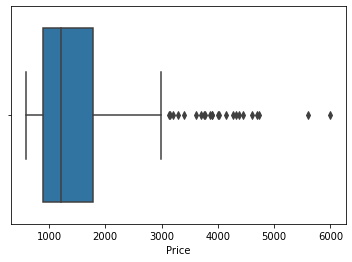

In [58]:
sns.boxplot(laptop2['Price'])
plt.show()

Well, lets limit the price, discard the price higher than 4000, cause thats too expensive, eventhough the features is reasonable

In [59]:
laptop2.drop(laptop2[laptop2['Price'] >= 4000].index, inplace=True)
laptop2.shape

(3633, 13)

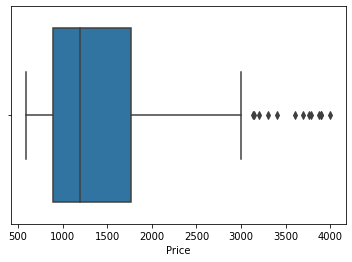

In [60]:
sns.boxplot(laptop2['Price'])
plt.show()

# Data Viz for Categorical Column (Check)
Because, before we get started to modelling the data, we need to convert the categorical values into numerical,    
whether change it with one-hot-encoding or label-encoding
I will show it in the next part jupyter notebook

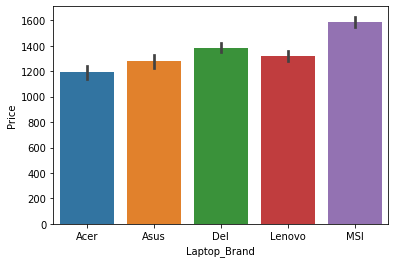

In [61]:
#check price variety in Laptop_Brand
sns.barplot(x='Laptop_Brand', y='Price', data=laptop2)
plt.show()

The Price variety of Laptop Brand is quite the same, MSI is the highest   
Same with the price market, MSI is expensive

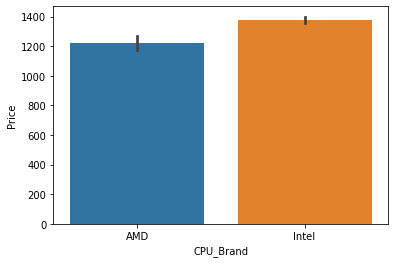

In [62]:
#check price variety in CPU_Brand
sns.barplot(x='CPU_Brand', y='Price', data=laptop2)
plt.show()

There isn't any significant different price in these two

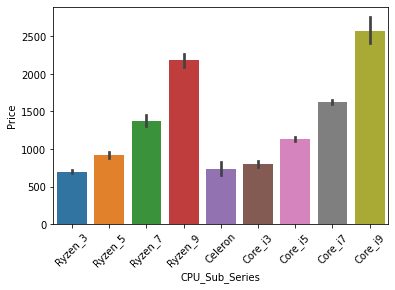

In [63]:
#Check CPU_Sub_Series
sns.barplot(x='CPU_Sub_Series', y='Price', data=laptop2)
plt.xticks(rotation=45)
plt.show()

Yeah, this quite corresponds to reality, let aside the celeron      
Ryzen 3 == Core i3   
Ryzen 5 == Core i5   
Ryzen 7 == Core i7   
Ryzen 9 == Core i9   
What distinguishes the next price is the number and generation of CPU, that we drop before

     Resolution  Average Price
4   1920 x 1280     948.500000
0    1366 x 768     958.303249
1    1600 x 900     961.040250
6   2256 x 1504     962.065000
2   1920 x 1080    1339.740649
10  3200 x 1800    1423.842273
5   2160 x 1350    1710.423333
12  3840 x 2160    1824.044737
3   1920 x 1200    1893.519216
8   2560 x 1600    1977.095000
9   3072 x 1920    1999.990000
7   2560 x 1440    2146.396957
13  3840 x 2400    2265.715714
11  3456 x 2160    2475.845714


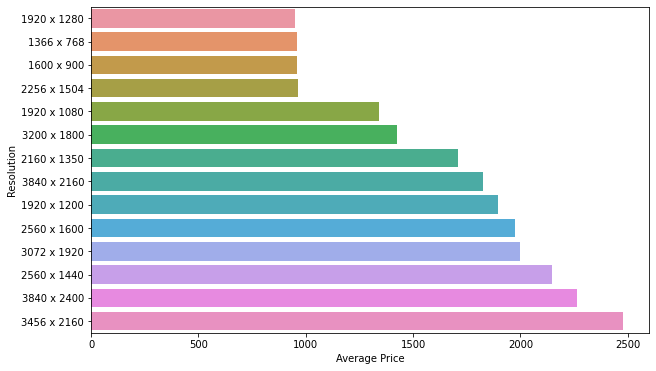

In [64]:
#Check Resolution
RS = laptop2.groupby('Resolution')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(RS)
plt.figure(figsize=(10,6)) 
sns.barplot(x='Average Price', y='Resolution', data=RS, order=RS.sort_values('Average Price').Resolution)
plt.show()

This is interesting found in our data, usually the higher resolution, the more expensive it gets.    
But, dont forget the features that the laptop have, it also determines the prices  

In [65]:
#just check
lt=laptop2.groupby('Resolution', as_index=False).mean()
lt[lt['Resolution'].isin(['3200 x 1800', '1920 x 1200', '2560 x 1600'])]

,Resolution,RAM,Screen_Size,Touchscreen,SSD,HDD,Weight,Price
3,1920 x 1200,20.862745,14.707843,0.352941,809.568627,0.0,1.670588,1893.519216
8,2560 x 1600,26.153846,15.819231,0.230769,1243.384615,0.0,2.116154,1977.095000
10,3200 x 1800,10.545455,13.300000,0.000000,387.636364,0.0,1.283636,1423.842273


  Panel_Type  Average Price
2         TN    1012.569867
0        IPS    1437.354208
1       OLED    1957.550690


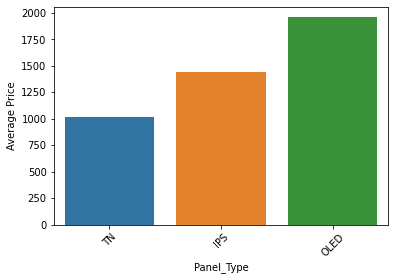

In [66]:
#Check Panel Type
PT = laptop2.groupby('Panel_Type')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(PT)
sns.barplot(x='Panel_Type', y='Average Price', data=PT, order=PT.sort_values('Average Price').Panel_Type)
plt.xticks(rotation=45)
plt.show()

Yeah, OLED is the expensive one, because the newest technology so color is more sharper.   
TN is the older technology so the price is more cheap

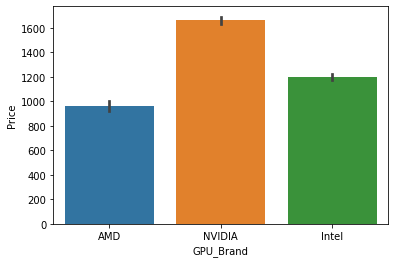

In [67]:
#Check GPU Brand
sns.barplot(x='GPU_Brand', y='Price', data=laptop2)
plt.show()

Actually that determines the price of GPU_Brand is also the GPU series, and number,  
like in example,       
NVIDIA GPX < NVIDIA RTX   
NVIDIA RTX 3080 > NVIDIA RTX 2060

So,, here is my decision about the categorical value    

One-Hot-Encoding :        
Laptop_Brand, CPU_Brand, CPU_Sub_Series, GPU_Brand    
    
Label-Encoding :        
Resolution, Panel_Type

# Just Curiosity on Numerical Value

    RAM  Average Price
3    12     962.050000
5    20     963.046994
1     6     981.525000
2     8    1064.774608
8    36    1184.743774
0     4    1309.463396
4    16    1459.645680
7    32    1664.123094
6    24    1666.394444
9    40    1827.358372
11   64    1997.949704
10   48    2239.000000


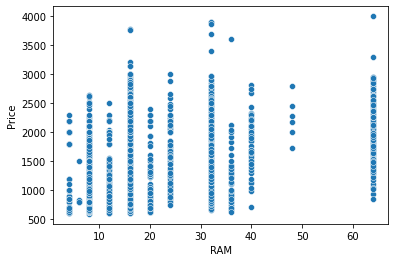

In [68]:
#Check RAM Average Price
RM = laptop2.groupby('RAM')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(RM)

#sns.barplot(x='RAM', y='Average Price', data=RM, order=RM.sort_values('Average Price').RAM)

sns.scatterplot(x='RAM', y = 'Price', data = laptop2)
plt.show()

    Screen_Size  Average Price
1          12.5     774.495000
0          12.3     948.500000
5          13.5     962.065000
6          13.9    1189.301429
3          13.3    1249.827028
7          14.0    1279.877224
11         16.1    1302.680000
9          15.6    1337.869936
13         17.3    1478.154239
4          13.4    1623.018286
2          13.0    1710.423333
10         16.0    1991.294000
12         17.0    2519.644706
8          15.0    2575.000000


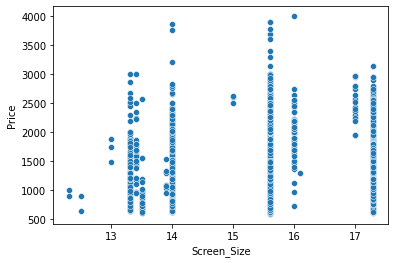

In [69]:
#Check Screen Size
SS = laptop2.groupby('Screen_Size')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(SS)

#plt.figure(figsize=(8,5))
#sns.barplot(x='Screen_Size', y='Average Price', data=SS, order=SS.sort_values('Average Price').Screen_Size)
#plt.xticks(rotation=45)

sns.scatterplot(x='Screen_Size', y='Price', data=laptop2)
plt.show()

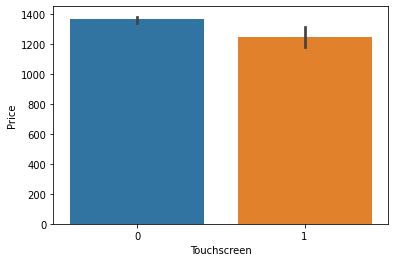

In [70]:
sns.barplot(x='Touchscreen', y='Price', data=laptop2)
plt.show()

This is quite interesting for me, maybe in laptop that dont have Touchscreen features, they have another higher specifications

     SSD  Average Price
3     64     736.970000
1     16     795.396000
4    120     999.000000
7    256    1116.283172
0      0    1192.761959
6    250    1224.950000
5    128    1238.536584
9    512    1257.477145
8    500    1278.465714
10  1000    1483.014677
2     32    1632.886667
11  2000    1756.587280
12  4000    2325.753651
13  8000    3754.000000


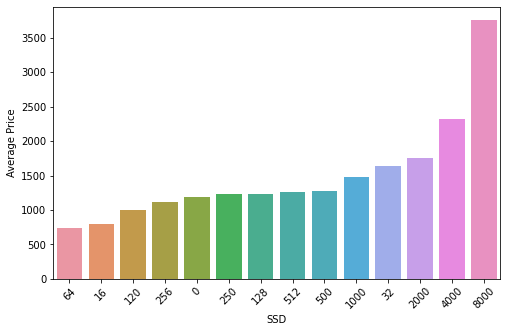

In [71]:
#Check SSD
SSD2 = laptop2.groupby('SSD')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(SSD2)

plt.figure(figsize=(8,5))
sns.barplot(x='SSD', y='Average Price', data=SSD2, order=SSD2.sort_values('Average Price').SSD)
plt.xticks(rotation=45)

plt.show()

    HDD  Average Price
2  1000    1220.029161
1   500    1311.135000
0     0    1374.487265
3  2000    1546.281918


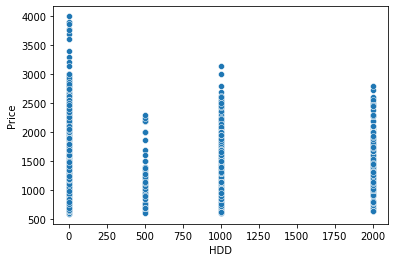

In [72]:
#Check HDD
HDD2 = laptop2.groupby('HDD')['Price'].mean().reset_index().rename({'Price':'Average Price'}, axis = 'columns').sort_values('Average Price')
print(HDD2)

#sns.barplot(x='HDD', y='Average Price', data=HDD2, order=HDD2.sort_values('Average Price').HDD)

sns.scatterplot(x='HDD', y='Price', data=laptop2)
plt.show()

Well, for SSD and HDD, they have dependency for each other,   
you can see in the first section, "Storage" column  
like in example   
"128GB SSD + 1000GB HDD"   
"1000GB SSD + 1000GB HDD"

<AxesSubplot:xlabel='Price', ylabel='Weight'>

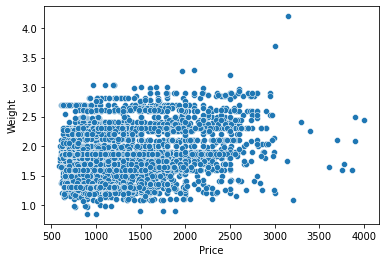

In [73]:
#Check Weight 
sns.scatterplot(x='Price', y='Weight', data=laptop2)

In [74]:
laptop2.to_csv (r'D:\Data Science\DatasetandPublish\datalaptop\Clean.csv', index=False)